The dataset's purpose in this notebook is to explore factors influencing refund requests and analyze the interplay between passenger attributes, ticket characteristics, and journey outcomes.

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
# Read the data
maven_data = pd.read_csv("../datasets/raw/TrainRides.csv", delimiter=";")

## Introduction to the data

In [31]:
maven_data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,08/12/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,01/01/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,16/12/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,01/01/2024,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,19/12/2023,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,02/01/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,20/12/2023,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,01/01/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,27/12/2023,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,01/01/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [32]:
maven_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

# Exploratory Data Analysis (EDA)


## Missing values
* Railcard: 20,918 entries are missing, indicating passengers without a railcard. These were assigned to a new category, None, to retain their significance during modeling.
* Actual.Arrival: 1,880 missing values, corresponding to cancelled
trains.
* Reason for Delay: 27,481 missing entries occur only when the train status is On
Time. These were replaced with a new category, Not Delayed.

In [33]:
maven_data.isna().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [34]:
# Convert missing values to a new category since they will be useful in the model
maven_data['Railcard'] = maven_data['Railcard'].fillna("None")
print("NA values for Reason.for.Delay when journey status is not On Time: ",maven_data[maven_data['Journey Status']!='On Time']['Reason for Delay'].isna().sum())
maven_data['Reason for Delay'] = maven_data['Reason for Delay'].fillna("Not Delayed")
maven_data.isna().sum()

NA values for Reason.for.Delay when journey status is not On Time:  0


Transaction ID            0
Date of Purchase          0
Time of Purchase          0
Purchase Type             0
Payment Method            0
Railcard                  0
Ticket Class              0
Ticket Type               0
Price                     0
Departure Station         0
Arrival Destination       0
Date of Journey           0
Departure Time            0
Arrival Time              0
Actual Arrival Time    1880
Journey Status            0
Reason for Delay          0
Refund Request            0
dtype: int64

## Univariate Analysis

### Categorical Data

8 categorical data attributes are explored and the count of each category for each attribute is shown in the below charts.

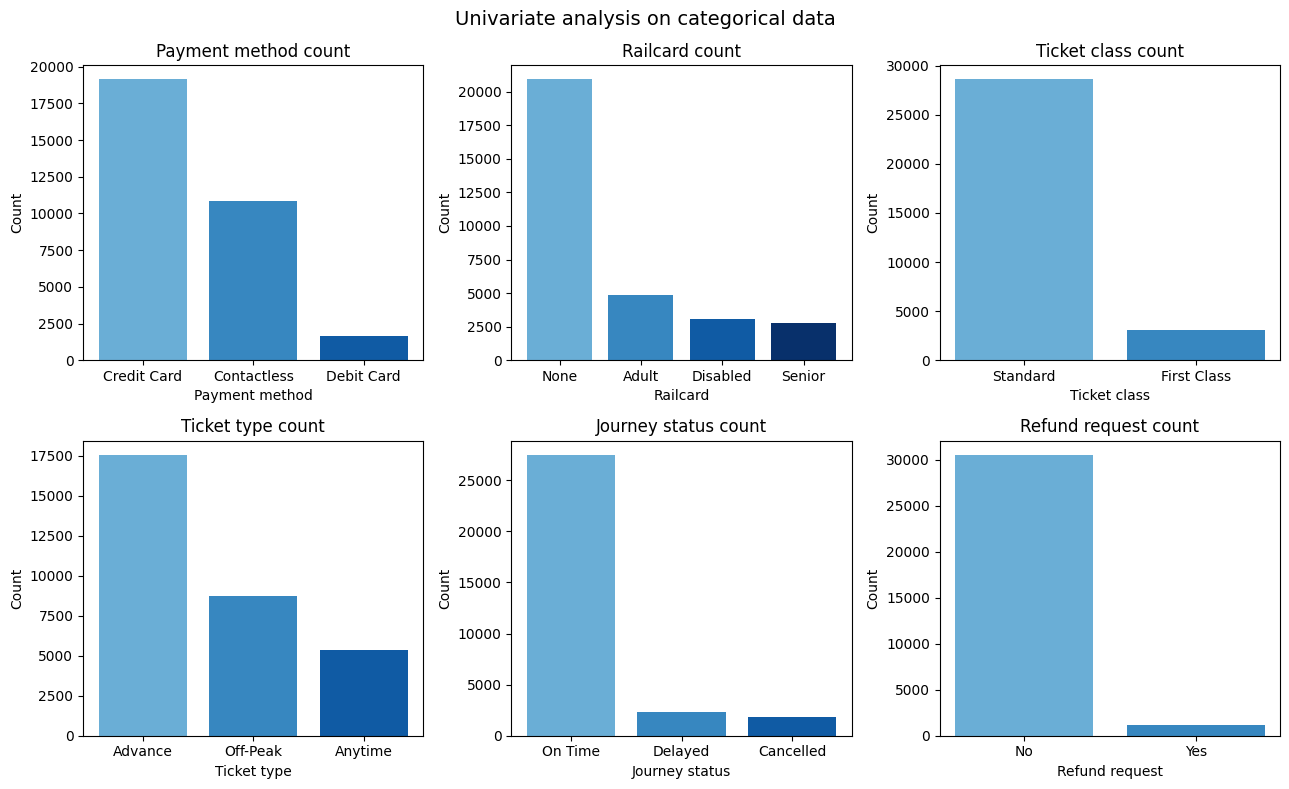

In [35]:
# Box plots for the categorical variables
fig, axs = plt.subplots(2,3,figsize=(13, 8))
fig.suptitle("Univariate analysis on categorical data",fontsize=14)

colormap = plt.cm.Blues
colors = colormap(np.linspace(0.5, 1, 4))

payment_counts = maven_data['Payment Method'].value_counts()
axs[0,0].bar(payment_counts.index, payment_counts.values, color = colors)
axs[0,0].set(xlabel='Payment method',ylabel = 'Count', title = 'Payment method count')

railcard_counts = maven_data['Railcard'].value_counts()
axs[0,1].bar(railcard_counts.index, railcard_counts.values, color = colors)
axs[0,1].set(xlabel='Railcard',ylabel = 'Count', title = 'Railcard count')

ticket_class_counts = maven_data['Ticket Class'].value_counts()
axs[0,2].bar(ticket_class_counts.index, ticket_class_counts.values, color = colors)
axs[0,2].set(xlabel='Ticket class',ylabel = 'Count', title = 'Ticket class count')

ticket_type_counts = maven_data['Ticket Type'].value_counts()
axs[1,0].bar(ticket_type_counts.index, ticket_type_counts.values, color = colors)
axs[1,0].set(xlabel='Ticket type',ylabel = 'Count', title = 'Ticket type count')

journey_status_counts = maven_data['Journey Status'].value_counts()
axs[1,1].bar(journey_status_counts.index, journey_status_counts.values, color = colors)
axs[1,1].set(xlabel='Journey status',ylabel = 'Count', title = 'Journey status count')

refund_counts = maven_data['Refund Request'].value_counts()
axs[1,2].bar(refund_counts.index, refund_counts.values, color = colors)
axs[1,2].set(xlabel='Refund request',ylabel = 'Count', title = 'Refund request count')

plt.tight_layout()

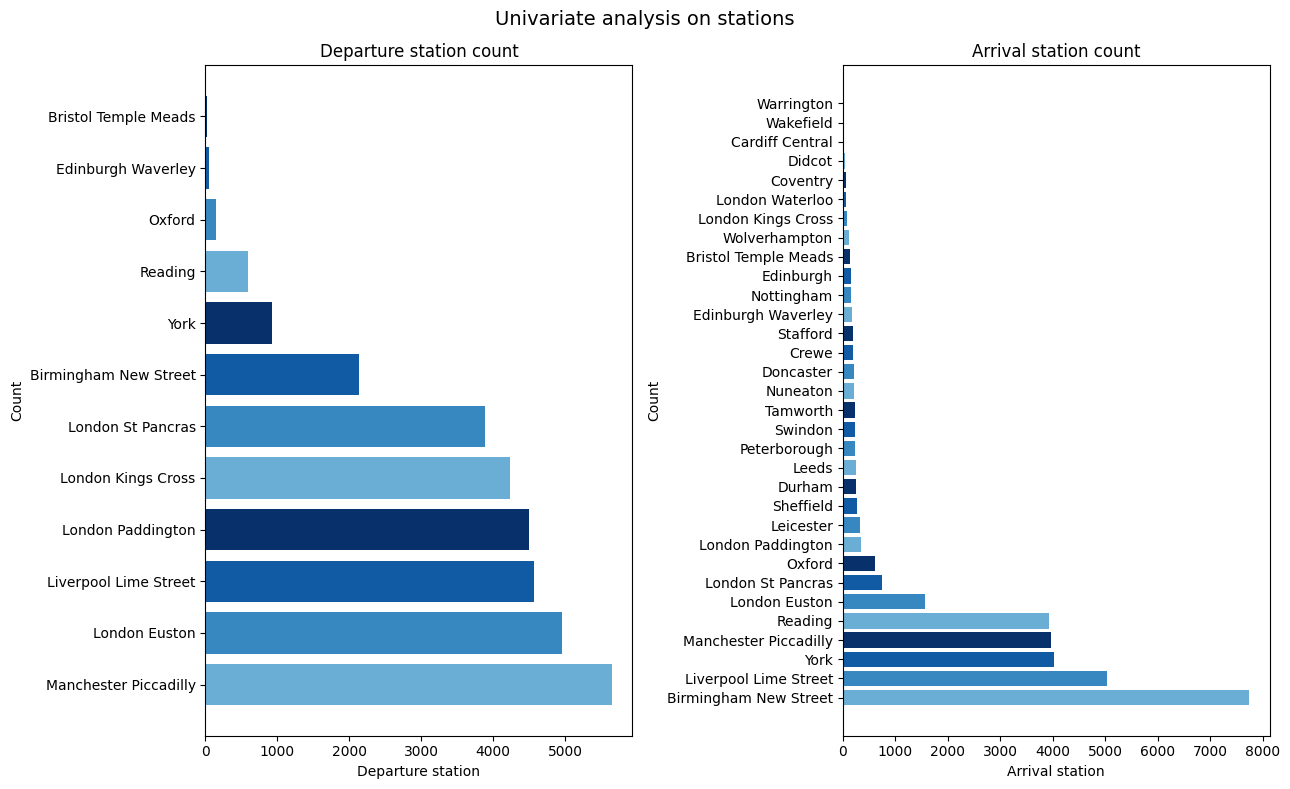

In [36]:
fig, axs = plt.subplots(1,2,figsize=(13, 8))
fig.suptitle("Univariate analysis on stations",fontsize=14)

dept_station_counts = maven_data['Departure Station'].value_counts()
axs[0].barh(dept_station_counts.index, dept_station_counts.values, color = colors)
axs[0].set(xlabel='Departure station' ,ylabel = 'Count', title = 'Departure station count')

arr_station_counts = maven_data['Arrival Destination'].value_counts()
axs[1].barh(arr_station_counts.index, arr_station_counts.values, color = colors)
axs[1].set(xlabel='Arrival station' ,ylabel = 'Count', title = 'Arrival station count')

plt.tight_layout()

### Numerical Variable
Price is the only numerical data attribute. It has a mean of £23.43 and a standard deviation of £29.99. The median is at £11.00, and it has a range of £266.

In [37]:
# Describing the numerical variable
maven_data["Price"].describe()

count    31653.000000
mean        23.439200
std         29.997628
min          1.000000
25%          5.000000
50%         11.000000
75%         35.000000
max        267.000000
Name: Price, dtype: float64

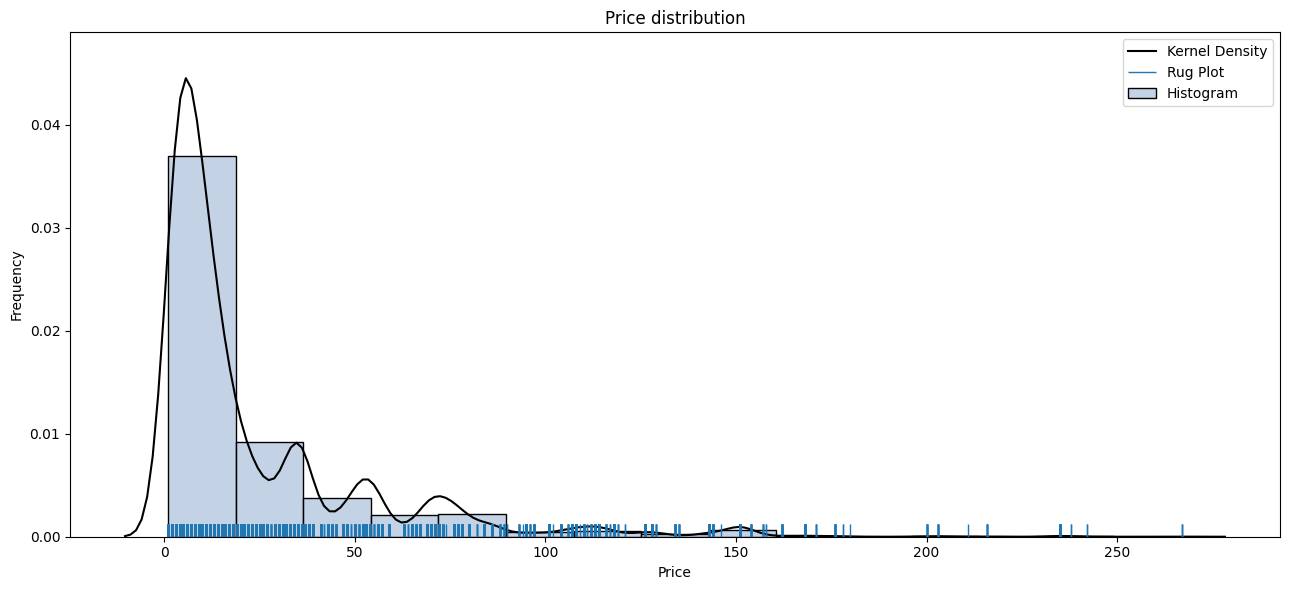

In [38]:
# Histogram, KDE and rug plot for Price distribution
plt.figure(figsize=(13,6))

sns.kdeplot( maven_data['Price'], color="black", label="Kernel Density")
sns.histplot(maven_data['Price'], stat="density", color="lightsteelblue", label="Histogram", bins=15)
sns.rugplot(maven_data['Price'], label="Rug Plot")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.legend()

plt.tight_layout()
plt.show()


From the above histogram / KDE plot, it is clear that the price distribution is heavily right skewed with most of the tickets purchased at a much cheaper price.

## Multivariate Analysis

### Time series analysis of ticket types
* The analysis highlights trends in ticket type purchases over time:
* Advance: Purchases steadily increase from February to March 2024.
* Anytime: Sales remain relatively stable, with a slight dip during the peak
of Advance ticket purchases.
* Off-Peak: Peaks in early April but declines as Advance ticket purchases
peak.

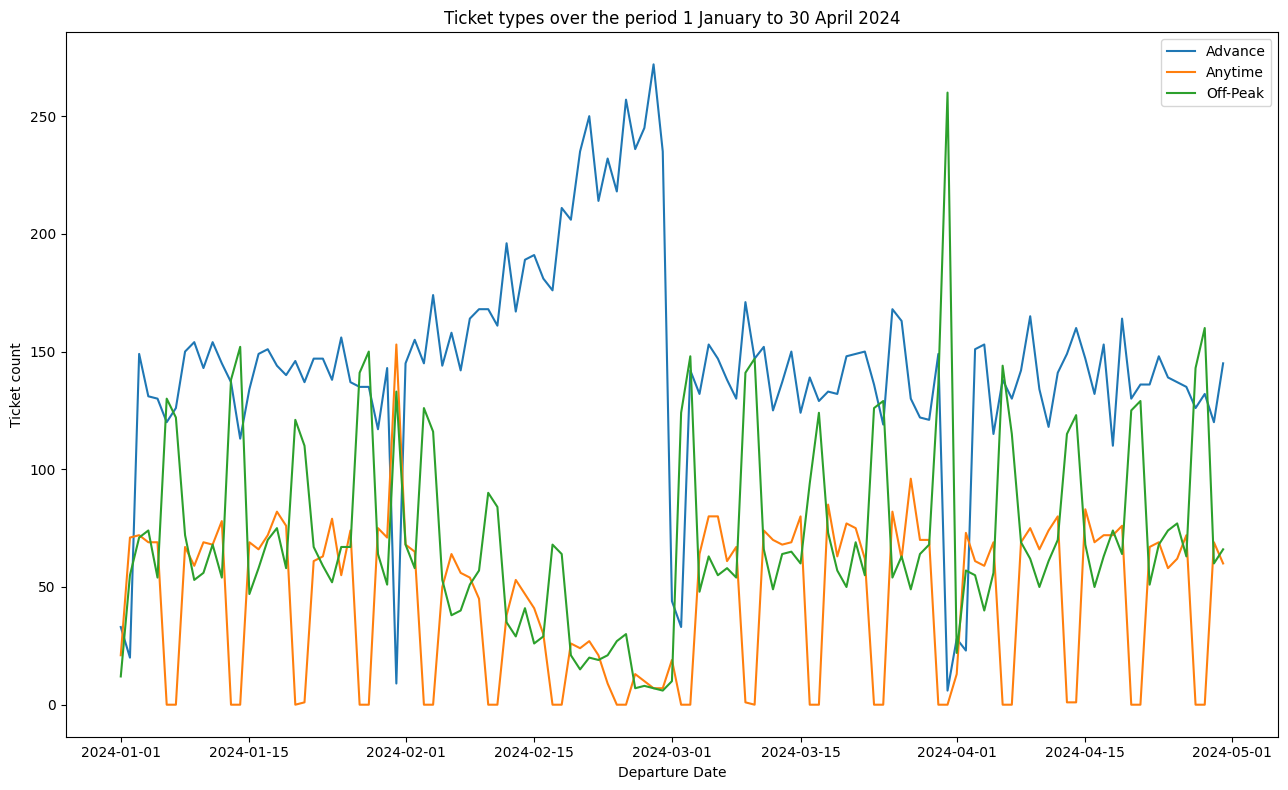

In [39]:
# Get the dates from the departure column
maven_data['Date of Journey'] = pd.to_datetime(maven_data['Date of Journey'], format='%d/%m/%Y')
# Get count of data per date per ticket type
journey_counts = pd.crosstab(maven_data['Date of Journey'], maven_data['Ticket Type'])

# Plot the line chart
plt.figure(figsize=(13,8))
for type in journey_counts.columns:
    plt.plot(journey_counts.index, journey_counts[type], label=type)
plt.xlabel('Departure Date')
plt.ylabel('Ticket count')
plt.title('Ticket types over the period 1 January to 30 April 2024')
plt.legend()

plt.tight_layout()
plt.show()

### Relationship between the Journey status and Refund request
* This analysis was done to confirm whether a refund is requested only if
the journey status is cancelled or delayed.
* It can be inferred that the majority of passengers do not request a refund
even if their train was delayed or cancelled.

In [40]:
pd.crosstab(maven_data['Journey Status'],maven_data['Refund Request'])

Refund Request,No,Yes
Journey Status,,
Cancelled,1308,572
Delayed,1746,546
On Time,27481,0


### Reasons for delay / cancellation according to the journey status

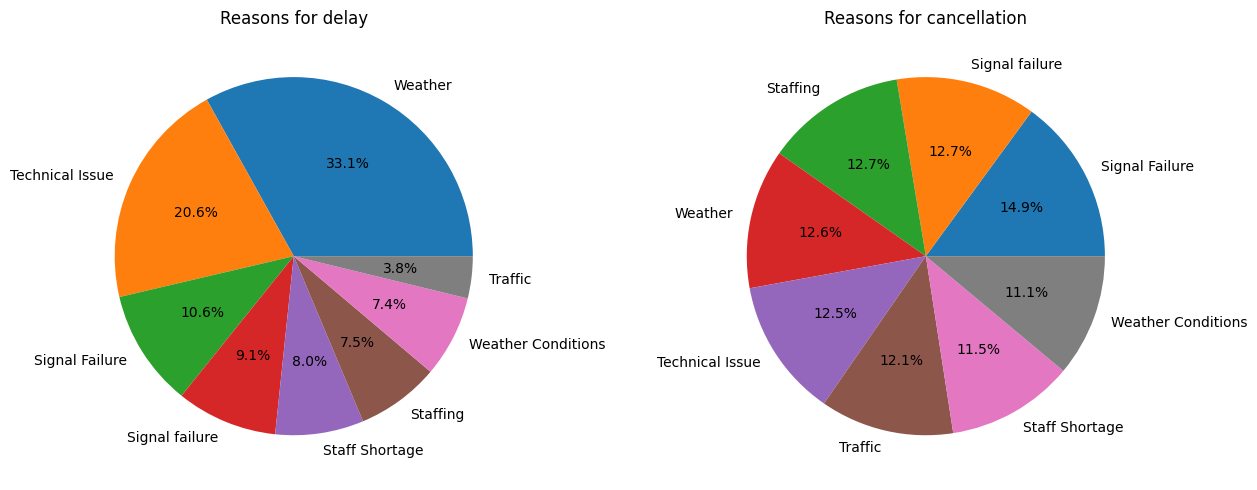

In [41]:
fig, axs = plt.subplots(1,2,figsize=(13, 5))

# Reasons for delay when journey status is delayed
reason_counts_delay = maven_data.groupby('Journey Status')['Reason for Delay'].value_counts()
axs[0].pie(reason_counts_delay['Delayed'].values, labels=reason_counts_delay['Delayed'].index, autopct='%1.1f%%')
axs[0].set_title('Reasons for delay')

# Reasons for delay when journey status is cancelled
reason_counts_cancel = maven_data.groupby('Journey Status')['Reason for Delay'].value_counts()
axs[1].pie(reason_counts_cancel['Cancelled'].values, labels=reason_counts_cancel['Cancelled'].index, autopct='%1.1f%%')
axs[1].set_title('Reasons for cancellation')

plt.tight_layout()
plt.show()

### Price distribution by Ticket class and Ticket Type
* It can be observed that First Class tickets are generally priced higher than
Standard tickets.
* Most of the Standard class tickets are below £25 for all ticket types
whereas First Class ticket prices are more evenly distributed.
* The price increases from Advance to Off-peak to Anytime ticket types.

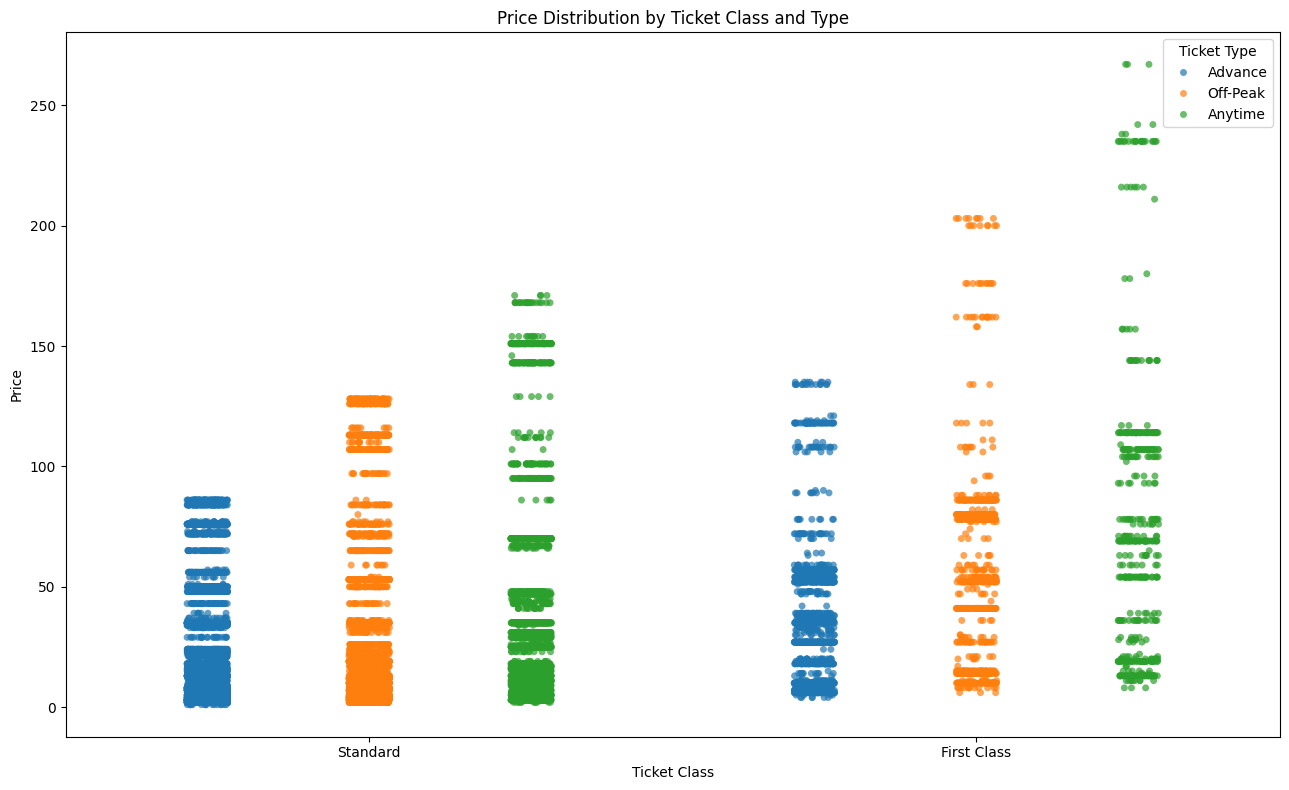

In [42]:
plt.figure(figsize=(13,8))

sns.stripplot(
    data=maven_data,
    x='Ticket Class',
    y='Price',
    hue='Ticket Type',
    jitter=True,
    dodge=True,
    alpha=0.7
)

plt.xlabel('Ticket Class')
plt.ylabel('Price')
plt.title('Price Distribution by Ticket Class and Type')
plt.legend(title='Ticket Type')
plt.tight_layout()
plt.show()

### Refund requested based on the price and status of the journey

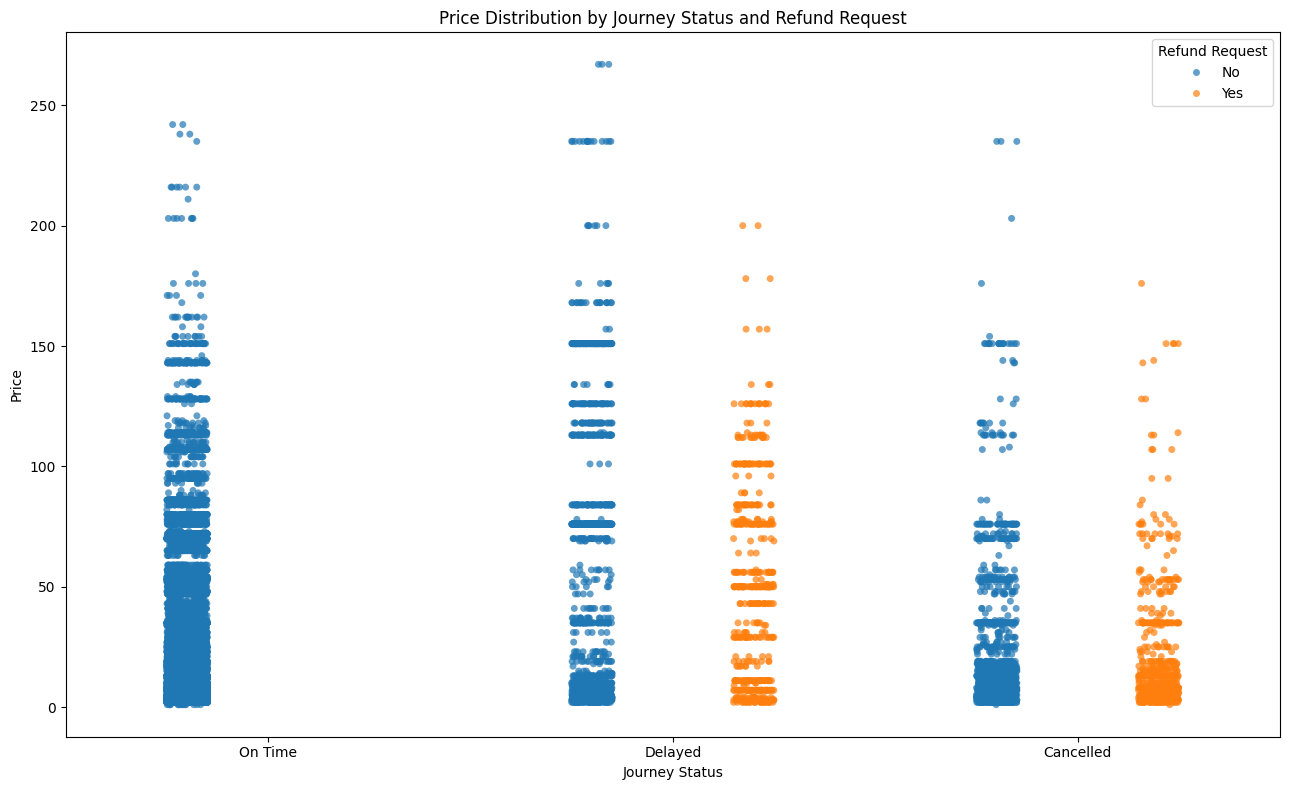

In [43]:
plt.figure(figsize=(13,8))

sns.stripplot(
    data=maven_data,
    x='Journey Status',
    y='Price',
    hue='Refund Request',
    jitter=True,
    dodge=True,
    alpha=0.7
)

plt.xlabel('Journey Status')
plt.ylabel('Price')
plt.title('Price Distribution by Journey Status and Refund Request')
plt.legend(title='Refund Request')
plt.tight_layout()

plt.show()

#### Heatmaps when journey status is Delayed or Cancelled
* Payment Method: 77% of passengers paying by debit card are likely to request a refund if their journey is delayed or cancelled, while over 70% of those using credit or contactless cards do not.
* Reason for Delay: The Reason for Delay attribute doesn't significantly affect refund requests, except for delays caused by weather, staff, or signal failure, where most passengers do not request a refund.
* Railcard: Passengers with a Disabled railcard or no railcard are more likely to not request a refund.
* Ticket Class: There’s no significant difference between Standard and First Class in terms of refund requests.
* Ticket Type: While most passengers across all ticket types do not request a refund, Off-Peak tickets show the highest proportion of refund requests.
* Departure Stations: Passengers departing from stations like Edinburgh Waverley and Oxford have a significantly higher likelihood of requesting a refund, compared to passengers from other stations.

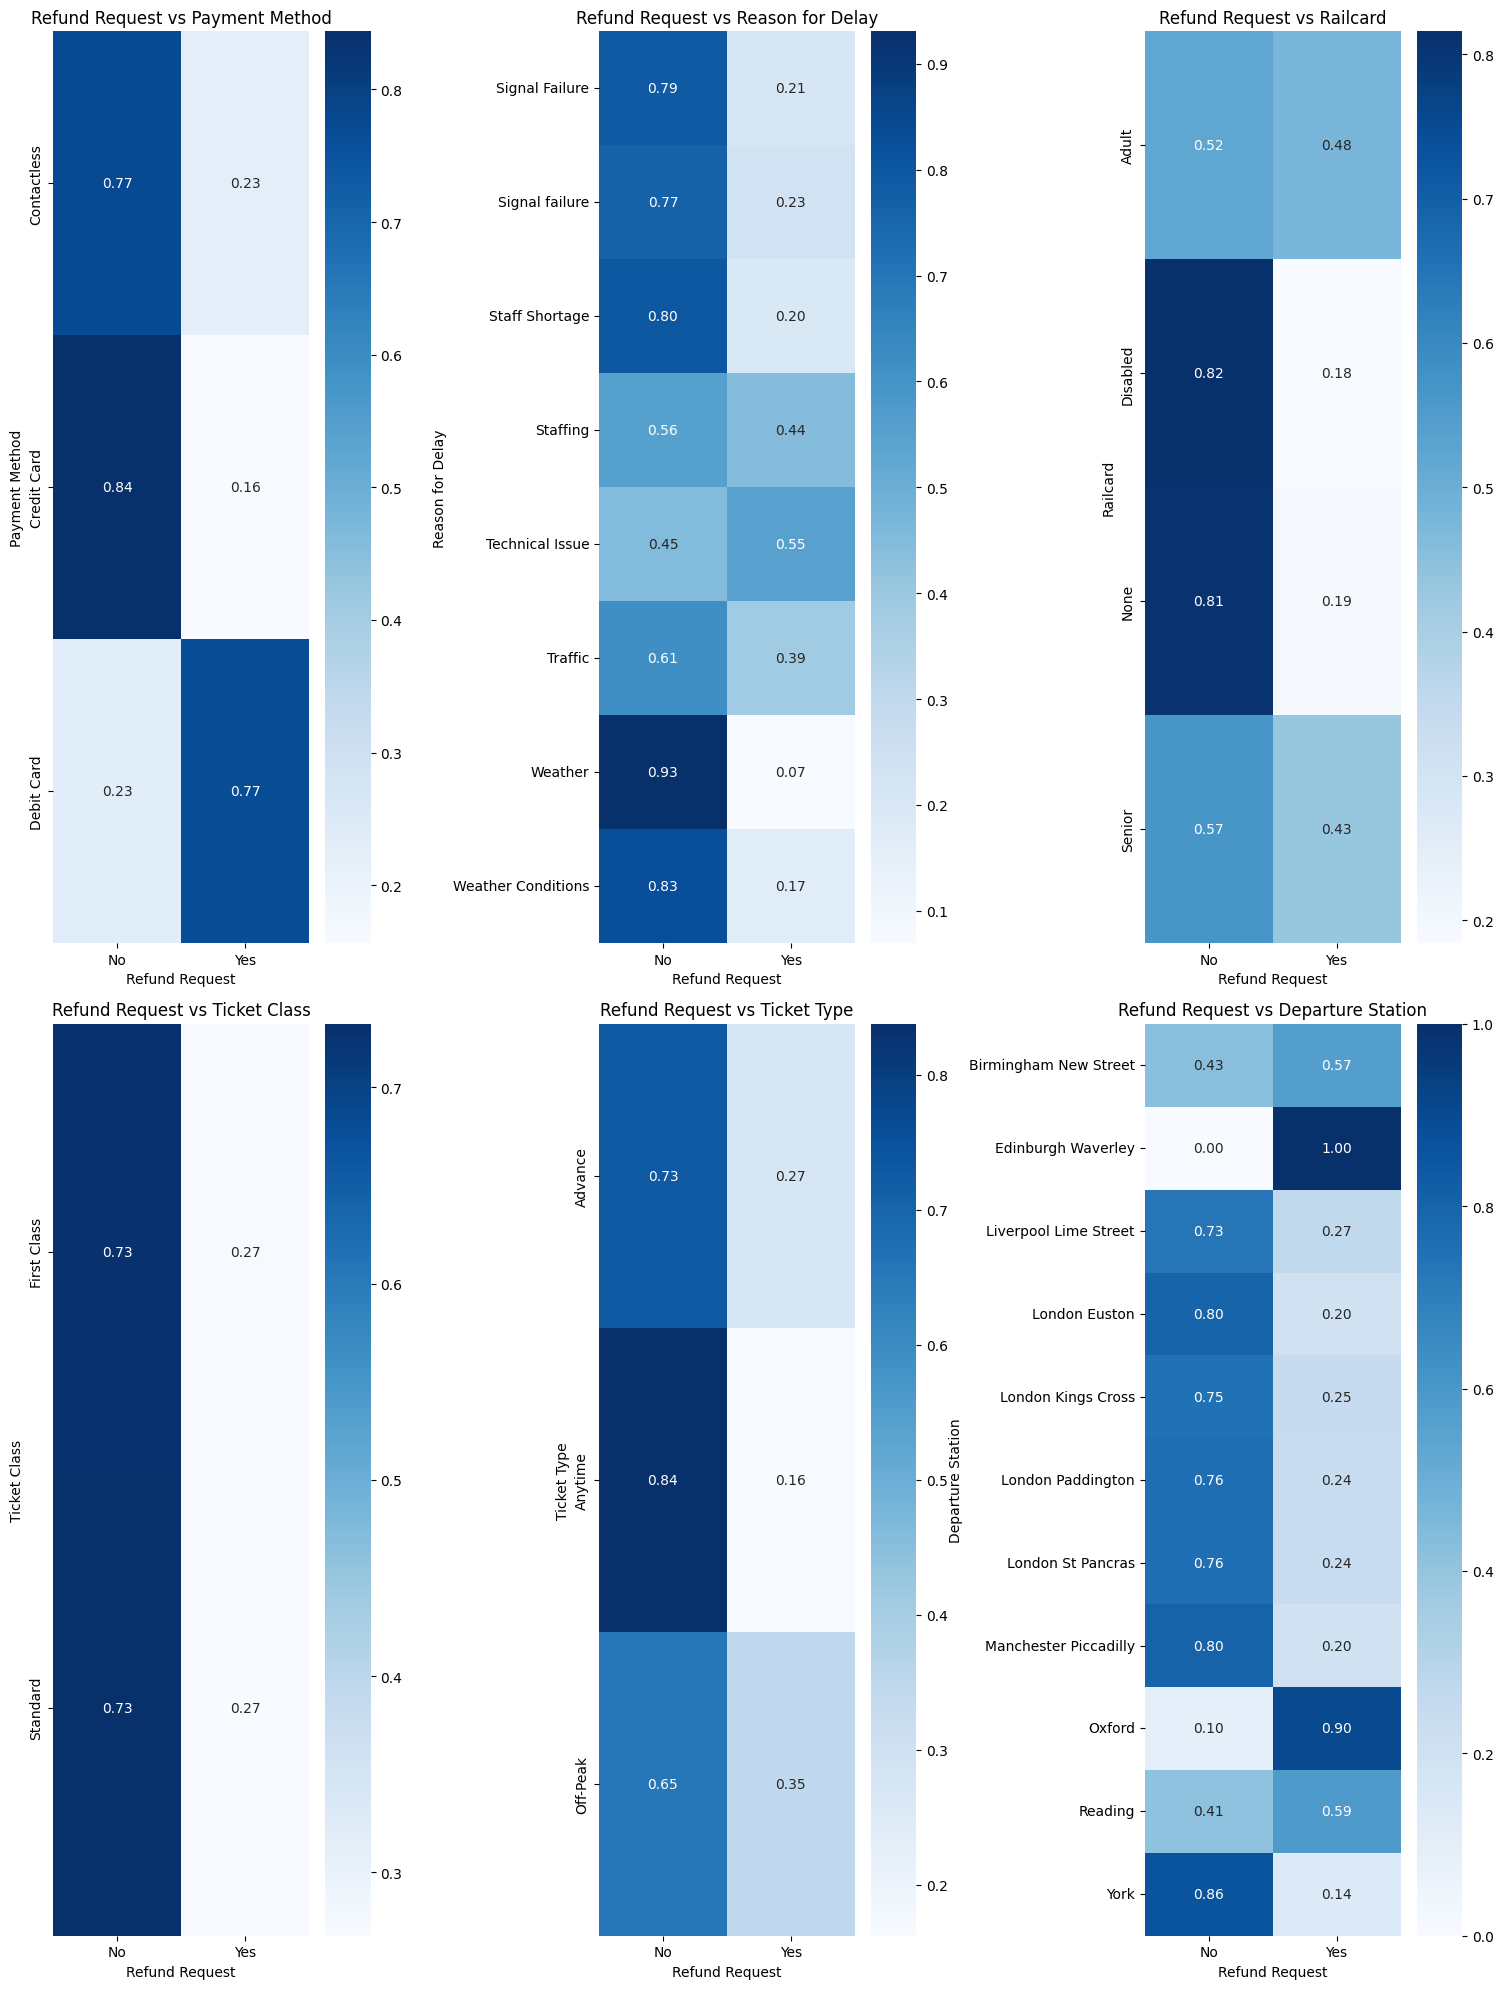

In [44]:
categorical_columns = ['Payment Method', 'Reason for Delay', 'Railcard', 'Ticket Class', 'Ticket Type', 'Departure Station']
column_names = ['Payment Method', 'Reason for Delay', 'Railcard', 'Ticket Class', 'Ticket Type', 'Departure Station']
filtered_data = maven_data[maven_data['Journey Status']!='On Time']

plt.figure(figsize=(15,20))
# Loop through the categorical data
for item, column in enumerate(categorical_columns):
    
    # Create and normalize contingency table
    contingency_table = pd.crosstab(filtered_data[column], filtered_data['Refund Request'])
    contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    
    plt.subplot(2, 3, item+1)
    sns.heatmap(contingency_table_norm, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Refund Request vs '+column_names[item])
    plt.xlabel('Refund Request')
    plt.ylabel(column_names[item])

plt.tight_layout()

plt.show()

# Calculation of Delay in Minutes 
The delay in minutes is calculated by subtracting Scheduled.Arrival from Actual.Arrival for delayed journeys. For on-time journeys, the value is set to NA. There is one NA value for delayed journeys, as the Scheduled.Arrival is missing for that entry.

In [45]:
# Subtract Actual Arrival with Scheduled Arrival
maven_data['Actual Arrival Time'] = pd.to_timedelta(maven_data['Actual Arrival Time'])
maven_data['Arrival Time'] = pd.to_timedelta(maven_data['Arrival Time'])

# Calculate the delay, accounting for the potential next day overflow
maven_data['DelayInMinutes'] = (maven_data['Actual Arrival Time'] - maven_data['Arrival Time']).dt.total_seconds() / 60
# If delay is negative (next day), add 24 hours (1 day = 1440 minutes)
maven_data['DelayInMinutes'] = maven_data['DelayInMinutes'].apply(lambda x: x + 1440 if x < 0 else x)# When journey status is on time, set it to null. When journey status is cancelled, it is already null.

maven_data.loc[maven_data['Journey Status']=='On Time','DelayInMinutes'] = None
print("Number of NA values when status is delayed: ", maven_data.loc[maven_data['Journey Status']=='Delayed','DelayInMinutes'].isna().sum())
maven_data.head()

Number of NA values when status is delayed:  0


,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,DelayInMinutes
0,da8a6ba8-b3dc-4677-b176,08/12/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,0 days 13:30:00,0 days 13:30:00,On Time,Not Delayed,No,NaN
1,b0cdd1b0-f214-4197-be53,16/12/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,0 days 11:35:00,0 days 11:40:00,Delayed,Signal Failure,No,5.0
2,f3ba7a96-f713-40d9-9629,19/12/2023,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,0 days 18:45:00,0 days 18:45:00,On Time,Not Delayed,No,NaN
3,b2471f11-4fe7-4c87-8ab4,20/12/2023,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,0 days 22:30:00,0 days 22:30:00,On Time,Not Delayed,No,NaN
4,2be00b45-0762-485e-a7a3,27/12/2023,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,0 days 19:00:00,0 days 19:00:00,On Time,Not Delayed,No,NaN


# Univariate Regression
A new column MediumPrice was added with values ‘Yes’ if the ticket is priced between £10 and £30 pounds (inclusive of £30) and ‘No’ otherwise.

In [46]:
# Consider only the cases where journey status is not on time
delayed_trains = maven_data[maven_data['Journey Status']!='On Time'].copy()

# Adding a new column MediumPrice to check if price is between 10 and 30.
delayed_trains['MediumPrice'] = "No"
delayed_trains.loc[(delayed_trains['Price']>10) & (delayed_trains['Price']<=30),'MediumPrice'] = "Yes"
delayed_trains_head = delayed_trains.head()
delayed_trains_head.to_csv("../datasets/raw/mediumhead.csv")

In [47]:
pd.crosstab(delayed_trains['MediumPrice'],delayed_trains['Refund Request'])

Refund Request,No,Yes
MediumPrice,,
No,2549,873
Yes,505,245


In [48]:
# Logistic Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Convert strings to binary output 0 and 1
labelEncoder = LabelEncoder()
delayed_trains['MediumPriceEncoded'] = labelEncoder.fit_transform(delayed_trains['MediumPrice'])
delayed_trains['RefundRequestEncoded'] = labelEncoder.fit_transform(delayed_trains['Refund Request'])

In [49]:
# Fit the model
X = delayed_trains[['MediumPriceEncoded']]
y = delayed_trains['RefundRequestEncoded']

model = LogisticRegression()
model.fit(X, y)
model.score(X,y)

# Get the model intercept and coefficient
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
print("Model intercept = ",b0, "\nModel coefficient = ", b1)

# To calculate probability
def logistic_probability(b0, b1, x):
    return 1 / (1 + np.exp(-(b0 + b1 * x)))
    

Model intercept =  -1.0709409839423263 
Model coefficient =  0.34564999276950314


In [50]:
# Create a new dataframe with the 2 values to be predicted
toPredictRefund = pd.DataFrame({'Price': [5,25]})
# Calculate MediumPrice for the 2 prices
toPredictRefund['MediumPrice'] = "No"
toPredictRefund.loc[(toPredictRefund['Price']>10) & (toPredictRefund['Price']<=30),'MediumPrice'] = "Yes"
# Convert to binary
toPredictRefund['MediumPriceEncoded'] = labelEncoder.fit_transform(toPredictRefund['MediumPrice'])
# Predict the output
toPredictRefund['RefundRequestEncoded'] = model.predict(toPredictRefund[['MediumPriceEncoded']])

# Calculating the probabilities
prob_5 = logistic_probability(b0, b1, toPredictRefund['MediumPriceEncoded'][0])
prob_25 = logistic_probability(b0, b1, toPredictRefund['MediumPriceEncoded'][1])

toPredictRefund['RefundRequestProbability'] = [prob_5,prob_25]
toPredictRefund['RefundRequest'] = labelEncoder.inverse_transform(toPredictRefund['RefundRequestEncoded'])

print(f"Probability of requesting refund (Price £5): {prob_5}")
print(f"Probability of requesting refund (Price £25): {prob_25}")
toPredictRefund

Probability of requesting refund (Price £5): 0.2552241762370275
Probability of requesting refund (Price £25): 0.3262289363990948


,Price,MediumPrice,MediumPriceEncoded,RefundRequestEncoded,RefundRequestProbability,RefundRequest
0,5,No,0,0,0.255224,No
1,25,Yes,1,0,0.326229,No


Since both probabilities are below 0.5, we conclude that passengers are unlikely to request a refund in either case.

# Multivariate Regression
To predict whether a passenger requests a refund, a logistic regression model was used.

In [51]:
# Import all the libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## First Model – using all the features
There are 7 categorical and 2 numeric predictors chosen. Categorical variables are encoded using dummy variables, except for 3 with many categories, which were encoded as integers to reduce computational complexity.
* Independent variables
    * Categorical variables:
        * Dummies: 'Payment Method', 'Railcard', 'Ticket Type', 'Journey Status'
        * Encoded: 'Reason for Delay', 'Departure Station', 'Arrival Destination'
    * Numeric variables: 'Price', 'DelayInMinutes'
* Training the model
    * The dataset was split into training and testing sets to evaluate accuracy.
    * A logistic regression model was trained, and the metrics were observed.
    * VIF was used to check for multicollinearity. The Journey.Status On Time
column had a high VIF, so it was removed, and dummy variables for
'Delayed' and 'Cancelled' statuses were created.
    * From the model’s coefficients, it was evident that some features had
minimal impact. Variables such as 'Reason for Delay', 'Arrival Station', 'Price', and 'DelayInMinutes' had negligible coefficients, indicating they didn't add significant value to the model.

In [52]:
# The missing data in delay in minutes column was replaced with 0
maven_data['DelayInMinutes'] = maven_data['DelayInMinutes'].fillna(0)
categorical_columns_encode = ['Reason for Delay', 'Departure Station', 'Arrival Destination']
labelEncoder = [LabelEncoder()]*len(categorical_columns)
labelEncoder_y = LabelEncoder()

In [53]:
# Model 1 - using all the features

maven_data_ML = maven_data.copy()
# Encode categorical columns with many categories
for i,col in enumerate(categorical_columns_encode):
    maven_data_ML[col] = labelEncoder[i].fit_transform(maven_data_ML[col])
# Encode dependent variable
maven_data_ML['Refund Request'] = labelEncoder_y.fit_transform(maven_data_ML['Refund Request'])

# To create dummy variable for journey.status with delayed and cancelled columns
maven_data_ML['Journey Status'] = pd.Categorical(maven_data_ML['Journey Status'], categories=['On Time', 'Delayed', 'Cancelled'], ordered=True)

# Define the independent variables
X_numerical = maven_data_ML[['Price', 'DelayInMinutes']]
X_categorical = maven_data_ML[categorical_columns_encode]
X_dummies = pd.get_dummies(maven_data_ML[['Payment Method', 'Railcard', 'Ticket Type', 'Ticket Class', 'Journey Status']], drop_first=True).astype(int)
X = pd.concat([ X_dummies, X_categorical, X_numerical],axis=1)
# Define the dependent variable
y = maven_data_ML['Refund Request']
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

# Fit the logistic model
log_model1 = sm.Logit(y_train,X_train)
result=log_model1.fit()
print(result.summary2())

# Predict for training and test data
y_pred_prob_train = result.predict(X_train)
y_pred_train = (y_pred_prob_train >= 0.5).astype(int)
y_pred_prob_test = result.predict(X_test)
y_pred_test = (y_pred_prob_test >= 0.5).astype(int)

# Calculate the score for training and test data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy for training data: {accuracy_train:.2f}")
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for test data: {accuracy_test:.2f}")

# Compute confusion matrix for training and test data
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("\nConfusion Matrix for training data:")
print(conf_matrix_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix for test data:")
print(conf_matrix_test)

Optimization terminated successfully.
         Current function value: 0.065903
         Iterations 10
                              Results: Logit
Model:                   Logit               Method:              MLE      
Dependent Variable:      Refund Request      Pseudo R-squared:    0.576    
Date:                    2025-02-11 19:24    AIC:                 3784.7407
No. Observations:        28487               BIC:                 3908.5987
Df Model:                14                  Log-Likelihood:      -1877.4  
Df Residuals:            28472               LL-Null:             -4430.6  
Converged:               1.0000              LLR p-value:         0.0000   
No. Iterations:          10.0000             Scale:               1.0000   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Payment Method_C

The model achieves 97% and 98% accuracy on training and test sets respectively. The
training confusion matrix shows 27,162 correct 'No' predictions and 533 correct 'Yes' predictions. Due to the data being skewed, the model is biased towards predicting 'No', the goal is to fine-tune the model for better 'Yes' predictions.

In [54]:
# Variance inflation factor - to check for multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                       Feature       VIF
0   Payment Method_Credit Card  2.654839
1    Payment Method_Debit Card  1.340789
2            Railcard_Disabled  1.516167
3                Railcard_None  4.966425
4              Railcard_Senior  1.590021
5          Ticket Type_Anytime  1.437606
6         Ticket Type_Off-Peak  1.515999
7        Ticket Class_Standard  7.143211
8       Journey Status_Delayed  6.124139
9     Journey Status_Cancelled  2.822854
10            Reason for Delay  5.614217
11           Departure Station  4.812529
12         Arrival Destination  3.073226
13                       Price  2.373726
14              DelayInMinutes  2.624334


chosen_columns = 'Payment Method', 'Railcard', 'Journey Status', 'Departure Station'

## Final Model – after feature selection
* After evaluating the first model, features selected: 'Payment Method',
'Railcard', 'Journey Status', 'Departure Station'.
* 'Ticket Type' were removed after evaluation and EDA.
*  The final model achieved 97% accuracy, with improved True Negatives in
the confusion matrix.

In [55]:
# Model 2 - with selected features

# Define the independent and dependent variables
X_categorical = maven_data_ML[['Departure Station']]
X_dummies = pd.get_dummies(maven_data_ML[['Payment Method', 'Railcard', 'Journey Status', 'Ticket Class']], drop_first=True).astype(int)
X = pd.concat([X_dummies, X_categorical],axis=1)
y = maven_data_ML['Refund Request']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

# Fit the logistic model
log_model2 = sm.Logit(y_train,X_train)
result=log_model2.fit()
print(result.summary2())

# Predict for training and test data
y_pred_prob_train = result.predict(X_train)
y_pred_train = (y_pred_prob_train >= 0.5).astype(int)
y_pred_prob_test = result.predict(X_test)
y_pred_test = (y_pred_prob_test >= 0.5).astype(int)

# Calculate the score for training and test data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy for training data: {accuracy_train:.2f}")
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for test data: {accuracy_test:.2f}")

# Compute confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("\nConfusion Matrix for training data:")
print(conf_matrix_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix for test data:")
print(conf_matrix_test)

Optimization terminated successfully.
         Current function value: 0.073106
         Iterations 10
                              Results: Logit
Model:                   Logit               Method:              MLE      
Dependent Variable:      Refund Request      Pseudo R-squared:    0.530    
Date:                    2025-02-11 19:24    AIC:                 4183.1391
No. Observations:        28487               BIC:                 4257.4539
Df Model:                8                   Log-Likelihood:      -2082.6  
Df Residuals:            28478               LL-Null:             -4430.6  
Converged:               1.0000              LLR p-value:         0.0000   
No. Iterations:          10.0000             Scale:               1.0000   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Payment Method_C